In [1]:
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import shutil
import random

from deepcell.utils.tracking_utils import save_trks
from deepcell.utils.tracking_utils import load_trks

/opt/conda/lib/python3.7/site-packages/tensorflow-2.5.0-py3.7-linux-x86_64.egg/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [2]:
# Input file
fN = h5py.File("../22956814/22956814_featuresN.hdf5")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../22956814/22956814_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [3]:
# Get wells - data from timeseries_data, at position [2]

wells = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    if well in well_dict.keys():
        well_dict[well].append(i)

In [4]:
# ---------------------------NEW---------------------------------------

import gc

def make_lineage(well, mask_npy, suffix):
    """suffix = the number at the end of the mask_npy"""
    
    array = np.load(mask_npy)
    unique_worm_ids = list(np.unique(array))[1:]
    
    txt = '../22956814/%s_not_empty.txt' % well
    with open(txt, 'r') as f:
        start_end_samplings = f.read().splitlines()  # Cool!! 
        frame_start, frame_end, down_sampling = start_end_samplings[suffix-1].split(",")
        sampling = range(int(frame_start), int(frame_end)+1, int(down_sampling))
            
    pd = traj.loc[well_dict[well], :]
    lineages = {}
    
    for worm in unique_worm_ids:
        #worm_pd = pd.loc[pd['worm_index_joined'] == worm]

        nested_dict = {}
        nested_dict['label'] = int(worm)

        frame_list = [] 
        
        for i, frame in enumerate(array[:]):
            unique_pixels = list(np.unique(frame))
            if worm in unique_pixels:
                frame_list.append(i)
                
        nested_dict = {}
        #nested_dict['label'] = int(worm)
        nested_dict['frames'] = frame_list
        nested_dict['daughters'] = []
        nested_dict['capped'] = False
        nested_dict['frame-div'] = None
        nested_dict['parent'] = None

        lineages[int(worm)] = nested_dict
    
    del array
    gc.collect()
        
    return lineages

In [21]:
a1_1 = make_lineage('A1', "../22956814/A1_mask_1.npy", 1) 

# Well A2
a2_1 = make_lineage('A2', "../22956814/A2_mask_1.npy", 1) 
a2_2 = make_lineage('A2', "../22956814/A2_mask_2.npy", 2) 
a2_3 = make_lineage('A2', "../22956814/A2_mask_3.npy", 3) 
a2_4 = make_lineage('A2', "../22956814/A2_mask_4.npy", 4) 
a2_5 = make_lineage('A2', "../22956814/A2_mask_5.npy", 5) 

# Well A3
a3_1 = make_lineage('A3', "../22956814/A3_mask_1.npy", 1) 
a3_2 = make_lineage('A3', "../22956814/A3_mask_2.npy", 2) 
a3_3 = make_lineage('A3', "../22956814/A3_mask_3.npy", 3) 
a3_4 = make_lineage('A3', "../22956814/A3_mask_4.npy", 4) 
a3_5 = make_lineage('A3', "../22956814/A3_mask_5.npy", 5) 

# Well A4
a4_1 = make_lineage('A4', "../22956814/A4_mask_1.npy", 1) 
a4_2 = make_lineage('A4', "../22956814/A4_mask_2.npy", 2) 
a4_3 = make_lineage('A4', "../22956814/A4_mask_3.npy", 3) 
a4_4 = make_lineage('A4', "../22956814/A4_mask_4.npy", 4) 
a4_5 = make_lineage('A4', "../22956814/A4_mask_5.npy", 5) 

In [22]:
import psutil
psutil.virtual_memory()

svmem(total=439595151360, available=429863063552, percent=2.2, used=6089232384, free=231673409536, active=57281249280, inactive=146938855424, buffers=105615360, cached=201726894080, shared=9052160, slab=3146579968)

# Well Bs

In [23]:
b1_1 = make_lineage('B1', "../22956814/B1_mask_1.npy", 1)

b2_1 = make_lineage('B2', "../22956814/B2_mask_1.npy", 1)
b2_2 = make_lineage('B2', "../22956814/B2_mask_2.npy", 2)

b3_1 = make_lineage('B3', "../22956814/B3_mask_1.npy", 1)
b3_2 = make_lineage('B3', "../22956814/B3_mask_2.npy", 2)
b3_3 = make_lineage('B3', "../22956814/B3_mask_3.npy", 3)
b3_4 = make_lineage('B3', "../22956814/B3_mask_4.npy", 4)
b3_5 = make_lineage('B3', "../22956814/B3_mask_5.npy", 5)
b3_6 = make_lineage('B3', "../22956814/B3_mask_6.npy", 6)
b3_7 = make_lineage('B3', "../22956814/B3_mask_7.npy", 7)
b3_8 = make_lineage('B3', "../22956814/B3_mask_8.npy", 8)

b4_1 = make_lineage('B4', "../22956814/B4_mask_1.npy", 1)
b4_2 = make_lineage('B4', "../22956814/B4_mask_2.npy", 2)
b4_3 = make_lineage('B4', "../22956814/B4_mask_3.npy", 3)

# Well Cs

In [24]:
c1_1 = make_lineage('C1', "../22956814/C1_mask_1.npy", 1)
c1_2 = make_lineage('C1', "../22956814/C1_mask_2.npy", 2)
c1_3 = make_lineage('C1', "../22956814/C1_mask_3.npy", 3)
c1_4 = make_lineage('C1', "../22956814/C1_mask_4.npy", 4)
c1_5 = make_lineage('C1', "../22956814/C1_mask_5.npy", 5)
c1_6 = make_lineage('C1', "../22956814/C1_mask_6.npy", 6)
c1_7 = make_lineage('C1', "../22956814/C1_mask_7.npy", 7)

c2_1 = make_lineage('C2', "../22956814/C2_mask_1.npy", 1)
c2_2 = make_lineage('C2', "../22956814/C2_mask_2.npy", 2)

c3_1 = make_lineage('C3', "../22956814/C3_mask_1.npy", 1)
c3_2 = make_lineage('C3', "../22956814/C3_mask_2.npy", 2)
c3_3 = make_lineage('C3', "../22956814/C3_mask_3.npy", 3)

c4_1 = make_lineage('C4', "../22956814/C4_mask_1.npy", 1)
c4_2 = make_lineage('C4', "../22956814/C4_mask_2.npy", 2)

# Well Ds

In [25]:
d1_1 = make_lineage('D1', "../22956814/D1_mask_1.npy", 1)
d1_2 = make_lineage('D1', "../22956814/D1_mask_2.npy", 2)
d1_3 = make_lineage('D1', "../22956814/D1_mask_3.npy", 3)
d1_4 = make_lineage('D1', "../22956814/D1_mask_4.npy", 4)

d2_1 = make_lineage('D2', "../22956814/D2_mask_1.npy", 1)
d2_2 = make_lineage('D2', "../22956814/D2_mask_2.npy", 2)

d3_1 = make_lineage('D3', "../22956814/D3_mask_1.npy", 1)
d3_2 = make_lineage('D3', "../22956814/D3_mask_2.npy", 2)
d3_3 = make_lineage('D3', "../22956814/D3_mask_3.npy", 3)
d3_4 = make_lineage('D3', "../22956814/D3_mask_4.npy", 4)
d3_5 = make_lineage('D3', "../22956814/D3_mask_5.npy", 5)
d3_6 = make_lineage('D3', "../22956814/D3_mask_6.npy", 6)
d3_7 = make_lineage('D3', "../22956814/D3_mask_7.npy", 7)
d3_8 = make_lineage('D3', "../22956814/D3_mask_8.npy", 8)
d3_9 = make_lineage('D3', "../22956814/D3_mask_9.npy", 9)
d3_10 = make_lineage('D3', "../22956814/D3_mask_10.npy", 10)
d3_11 = make_lineage('D3', "../22956814/D3_mask_11.npy", 11)

d4_1 = make_lineage('D4', "../22956814/D4_mask_1.npy", 1)
d4_2 = make_lineage('D4', "../22956814/D4_mask_2.npy", 2)
d4_3 = make_lineage('D4', "../22956814/D4_mask_3.npy", 3)
d4_4 = make_lineage('D4', "../22956814/D4_mask_4.npy", 4)
d4_5 = make_lineage('D4', "../22956814/D4_mask_5.npy", 5)
d4_6 = make_lineage('D4', "../22956814/D4_mask_6.npy", 6)
d4_7 = make_lineage('D4', "../22956814/D4_mask_7.npy", 7)
d4_8 = make_lineage('D4', "../22956814/D4_mask_8.npy", 8)
d4_9 = make_lineage('D4', "../22956814/D4_mask_9.npy", 9)
d4_10 = make_lineage('D4', "../22956814/D4_mask_10.npy", 10)
d4_11 = make_lineage('D4', "../22956814/D4_mask_11.npy", 11)
d4_12 = make_lineage('D4', "../22956814/D4_mask_12.npy", 12)

In [27]:
# Load them all into .trks

masks_fn = [
    "../22956814/A1_mask_1.npy",
    "../22956814/A2_mask_1.npy",
    "../22956814/A2_mask_2.npy",
    "../22956814/A2_mask_3.npy",
    "../22956814/A2_mask_4.npy",
    "../22956814/A2_mask_5.npy",
    "../22956814/A3_mask_1.npy",
    "../22956814/A3_mask_2.npy",
    "../22956814/A3_mask_3.npy",
    "../22956814/A3_mask_4.npy",
    "../22956814/A3_mask_5.npy",
    "../22956814/A4_mask_1.npy",
    "../22956814/A4_mask_2.npy",
    "../22956814/A4_mask_3.npy",
    "../22956814/A4_mask_4.npy",
    "../22956814/A4_mask_5.npy",
    "../22956814/B1_mask_1.npy",
    "../22956814/B2_mask_1.npy",
    "../22956814/B2_mask_2.npy",
    "../22956814/B3_mask_1.npy",
    "../22956814/B3_mask_2.npy",
    "../22956814/B3_mask_3.npy",
    "../22956814/B3_mask_4.npy",
    "../22956814/B3_mask_5.npy",
    "../22956814/B3_mask_6.npy",
    "../22956814/B3_mask_7.npy",
    "../22956814/B3_mask_8.npy",
    "../22956814/B4_mask_1.npy",
    "../22956814/B4_mask_2.npy",
    "../22956814/B4_mask_3.npy",
    "../22956814/C1_mask_1.npy",
    "../22956814/C1_mask_2.npy",
    "../22956814/C1_mask_3.npy",
    "../22956814/C1_mask_4.npy",
    "../22956814/C1_mask_5.npy",
    "../22956814/C1_mask_6.npy",
    "../22956814/C1_mask_7.npy",
    "../22956814/C2_mask_1.npy",
    "../22956814/C2_mask_2.npy",
    "../22956814/C3_mask_1.npy",
    "../22956814/C3_mask_2.npy",
    "../22956814/C3_mask_3.npy",
    "../22956814/C4_mask_1.npy",
    "../22956814/C4_mask_2.npy",
    "../22956814/D1_mask_1.npy",
    "../22956814/D1_mask_2.npy",
    "../22956814/D1_mask_3.npy",
    "../22956814/D1_mask_4.npy",
    "../22956814/D2_mask_1.npy",
    "../22956814/D2_mask_2.npy",
    "../22956814/D3_mask_1.npy",
    "../22956814/D3_mask_2.npy",
    "../22956814/D3_mask_3.npy",
    "../22956814/D3_mask_4.npy",
    "../22956814/D3_mask_5.npy",
    "../22956814/D3_mask_6.npy",
    "../22956814/D3_mask_7.npy",
    "../22956814/D3_mask_8.npy",
    "../22956814/D3_mask_9.npy",
    "../22956814/D3_mask_10.npy",
    "../22956814/D3_mask_11.npy",
    "../22956814/D4_mask_1.npy",
    "../22956814/D4_mask_2.npy",
    "../22956814/D4_mask_3.npy",
    "../22956814/D4_mask_4.npy",
    "../22956814/D4_mask_5.npy",
    "../22956814/D4_mask_6.npy",
    "../22956814/D4_mask_7.npy",
    "../22956814/D4_mask_8.npy",
    "../22956814/D4_mask_9.npy",
    "../22956814/D4_mask_10.npy",
    "../22956814/D4_mask_11.npy",
    "../22956814/D4_mask_12.npy"
]


In [7]:
raws_fn = [
    "../22956814/A1_raw_1.npy",
    "../22956814/A2_raw_1.npy",
    "../22956814/A2_raw_2.npy",
    "../22956814/A2_raw_3.npy",
    "../22956814/A2_raw_4.npy",
    "../22956814/A2_raw_5.npy",
    "../22956814/A3_raw_1.npy",
    "../22956814/A3_raw_2.npy",
    "../22956814/A3_raw_3.npy",
    "../22956814/A3_raw_4.npy",
    "../22956814/A3_raw_5.npy",
    "../22956814/A4_raw_1.npy",
    "../22956814/A4_raw_2.npy",
    "../22956814/A4_raw_3.npy",
    "../22956814/A4_raw_4.npy",
    "../22956814/A4_raw_5.npy",
    "../22956814/B1_raw_1.npy",
    "../22956814/B2_raw_1.npy",
    "../22956814/B2_raw_2.npy",
    "../22956814/B3_raw_1.npy",
    "../22956814/B3_raw_2.npy",
    "../22956814/B3_raw_3.npy",
    "../22956814/B3_raw_4.npy",
    "../22956814/B3_raw_5.npy",
    "../22956814/B3_raw_6.npy",
    "../22956814/B3_raw_7.npy",
    "../22956814/B3_raw_8.npy",
    "../22956814/B4_raw_1.npy",
    "../22956814/B4_raw_2.npy",
    "../22956814/B4_raw_3.npy",
    "../22956814/C1_raw_1.npy",
    "../22956814/C1_raw_2.npy",
    "../22956814/C1_raw_3.npy",
    "../22956814/C1_raw_4.npy",
    "../22956814/C1_raw_5.npy",
    "../22956814/C1_raw_6.npy",
    "../22956814/C1_raw_7.npy",
    "../22956814/C2_raw_1.npy",
    "../22956814/C2_raw_2.npy",
    "../22956814/C3_raw_1.npy",
    "../22956814/C3_raw_2.npy",
    "../22956814/C3_raw_3.npy",
    "../22956814/C4_raw_1.npy",
    "../22956814/C4_raw_2.npy",
    "../22956814/D1_raw_1.npy",
    "../22956814/D1_raw_2.npy",
    "../22956814/D1_raw_3.npy",
    "../22956814/D1_raw_4.npy",
    "../22956814/D2_raw_1.npy",
    "../22956814/D2_raw_2.npy",
    "../22956814/D3_raw_1.npy",
    "../22956814/D3_raw_2.npy",
    "../22956814/D3_raw_3.npy",
    "../22956814/D3_raw_4.npy",
    "../22956814/D3_raw_5.npy",
    "../22956814/D3_raw_6.npy",
    "../22956814/D3_raw_7.npy",
    "../22956814/D3_raw_8.npy",
    "../22956814/D3_raw_9.npy",
    "../22956814/D3_raw_10.npy",
    "../22956814/D3_raw_11.npy",
    "../22956814/D4_raw_1.npy",
    "../22956814/D4_raw_2.npy",
    "../22956814/D4_raw_3.npy",
    "../22956814/D4_raw_4.npy",
    "../22956814/D4_raw_5.npy",
    "../22956814/D4_raw_6.npy",
    "../22956814/D4_raw_7.npy",
    "../22956814/D4_raw_8.npy",
    "../22956814/D4_raw_9.npy",
    "../22956814/D4_raw_10.npy",
    "../22956814/D4_raw_11.npy",
    "../22956814/D4_raw_12.npy"
]

In [29]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

In [30]:
print(len(y))
print(len(y_indices))

26
26


In [32]:
X = []

for i in y_indices:
    raw_array = np.load(raws_fn[i])
    X.append(raw_array)

In [33]:
print(len(X))

26


In [28]:
lineages = [
    a1_1,
    a2_1,
    a2_2,
    a2_3,
    a2_4,
    a2_5,
    a3_1,
    a3_2,
    a3_3,
    a3_4,
    a3_5,
    a4_1,
    a4_2,
    a4_3,
    a4_4,
    a4_5,
    b1_1,
    b2_1,
    b2_2,
    b3_1,
    b3_2,
    b3_3,
    b3_4,
    b3_5,
    b3_6,
    b3_7,
    b3_8,
    b4_1,
    b4_2,
    b4_3,
    c1_1,
    c1_2,
    c1_3,
    c1_4,
    c1_5,
    c1_6,
    c1_7,
    c2_1,
    c2_2,
    c3_1,
    c3_2,
    c3_3,
    c4_1,
    c4_2,
    d1_1,
    d1_2,
    d1_3,
    d1_4,
    d2_1,
    d2_2,
    d3_1,
    d3_2,
    d3_3,
    d3_4,
    d3_5,
    d3_6,
    d3_7,
    d3_8,
    d3_9,
    d3_10,
    d3_11,
    d4_1,
    d4_2,
    d4_3,
    d4_4,
    d4_5,
    d4_6,
    d4_7,
    d4_8,
    d4_9,
    d4_10,
    d4_11,
    d4_12
]

In [34]:
len(lineages)

73

In [35]:
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

In [36]:
print(len(lineages_true))

26


In [37]:
save_trks("../22956814.trks", lineages_true, X, y)

In [38]:
from deepcell.utils.tracking_utils import trks_stats

trks_stats("../22956814.trks")

####### IMPORTANT! error ALERT!!!

Dataset Statistics: 
Image data shape:  (26, 100, 530, 530, 1)
Number of lineages (should equal batch size):  26
Total number of unique tracks (cells)      -  56
Total number of divisions                  -  0
Average cell density (cells/100 sq pixels) -  0.00034764630172248544
Average number of frames per track         -  53


In [ ]:
# Why NaNs?

for i, each in enumerate(X):
    array_sum = np.sum(each)
    array_has_nan = np.isnan(array_sum)
    if array_has_nan == True:
        print(i)

In [13]:
# Check gif

def plot_gif(np_array, output_fn):
    mpl.rcParams['image.interpolation'] = 'none'  # Prevent mpl smoothes the edges
    os.mkdir("pic_temporary")  # To temporarily store the files

    #spring = cm.get_cmap('spring', 256)
    #newcolors = spring(np.linspace(0, 256, 256))
    #black = np.array([0/256, 0/256, 0/256, 1])
    #newcolors[:1, :] = black
    #newcmp = ListedColormap(newcolors)

    pic_list = []
    flag = 0

    for i in range(np_array.shape[0]):
        #plt.imshow(np_array[i], cmap=newcmp)
        mask = np_array[i]
        mask = np.where(mask==0, -1, mask) 
        #print(np.unique(mask_1))

        value = -1
        masked_array = np.ma.masked_where(mask == value, mask)

        #cmap = mpl.cm.get_cmap("spring")
        cmap = mpl.cm.get_cmap("spring").copy()
        cmap.set_bad(color='black')
        
        plt.imshow(masked_array, cmap=cmap)
        
        fn = 'pic_temporary/%d.jpg' % flag
        plt.savefig(fn)
        pic_list.append(fn)
        flag += 1
    
    with imageio.get_writer(output_fn, mode='I') as writer:
        for filename in pic_list:
            image = imageio.imread(filename)
            writer.append_data(image)
    
    # Remove the temporary file
    shutil.rmtree("pic_temporary")

In [108]:
# Source code from deepcell_trakcing/utils.py
from deepcell.utils.tracking_utils import save_trks, load_trks, trks_stats

training_data = load_trks('../22956814.trks')
X = training_data['X']
y = training_data['y']
daughters = [{cell: fields['daughters']
                for cell, fields in tracks.items()}
                for tracks in training_data['lineages']]

In [ ]:
import numpy as np

# Calculate division information
total_tracks = 0
total_divisions = 0
avg_frame_counts_in_batches = []
for batch, daughter_batch in enumerate(daughters):
    num_tracks_in_batch = len(daughter_batch)
    #print("1: ", num_tracks_in_batch)
    num_div_in_batch = len([c for c in daughter_batch if daughter_batch[c]])
    #print("2: ", num_div_in_batch)
    total_tracks = total_tracks + num_tracks_in_batch
    #print("3 (total_tracks): ", total_tracks)
    total_divisions = total_divisions + num_div_in_batch
    frame_counts = []
    for cell_id in daughter_batch.keys():
        frame_count = 0
        for frame in y[batch]:
            cells_in_frame = np.unique(frame)
            if cell_id in cells_in_frame:
                frame_count += 1
                # print(cell_id)  # Does print!
        frame_counts.append(frame_count)
        # print(frame_count)  # Does print!
    avg_frame_counts_in_batches.append(np.average(frame_counts))
    # print(frame_counts)  # Does print!!
print(avg_frame_counts_in_batches)
avg_num_frames_per_track = np.average(avg_frame_counts_in_batches)

In [ ]:
len(avg_frame_counts_in_batches)  # 23 is nan
#np.nanmean(a_list)

In [ ]:
b1_1 = make_lineage('B1', "../22956814/B1_mask_1.npy", 1)
b1_2 = make_lineage('B1', "../22956814/B1_mask_2.npy", 2)

In [ ]:
b1_2

In [ ]:
# TEST with smaller number

In [10]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

In [11]:
X = []

for i in y_indices:
    raw_array = np.load(raws_fn[i])
    X.append(raw_array)

In [12]:
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

In [13]:
from deepcell.utils.tracking_utils import save_trks

save_trks("../22956814_small.trks", lineages_true, X, y)

In [16]:
from deepcell.utils.tracking_utils import trks_stats

trks_stats("../22956814_small.trks")

Dataset Statistics: 
Image data shape:  (14, 100, 530, 530, 1)
Number of lineages (should equal batch size):  14
Total number of unique tracks (cells)      -  19
Total number of divisions                  -  0
Average cell density (cells/100 sq pixels) -  0.00034760718099984743
Average number of frames per track         -  70


# Sequential worm indices

In [5]:
# For sequential

a1_1 = make_lineage('A1', "../22956814/A1_mask_seq_1.npy", 1) 
a2_1 = make_lineage('A2', "../22956814/A2_mask_seq_1.npy", 1) 
a2_2 = make_lineage('A2', "../22956814/A2_mask_seq_2.npy", 2) 
a2_3 = make_lineage('A2', "../22956814/A2_mask_seq_3.npy", 3) 
a2_4 = make_lineage('A2', "../22956814/A2_mask_seq_4.npy", 4) 
a2_5 = make_lineage('A2', "../22956814/A2_mask_seq_5.npy", 5) 
a3_1 = make_lineage('A3', "../22956814/A3_mask_seq_1.npy", 1) 
a3_2 = make_lineage('A3', "../22956814/A3_mask_seq_2.npy", 2) 
a3_3 = make_lineage('A3', "../22956814/A3_mask_seq_3.npy", 3) 
a3_4 = make_lineage('A3', "../22956814/A3_mask_seq_4.npy", 4) 
a3_5 = make_lineage('A3', "../22956814/A3_mask_seq_5.npy", 5) 
a4_1 = make_lineage('A4', "../22956814/A4_mask_seq_1.npy", 1) 
a4_2 = make_lineage('A4', "../22956814/A4_mask_seq_2.npy", 2) 
a4_3 = make_lineage('A4', "../22956814/A4_mask_seq_3.npy", 3) 
a4_4 = make_lineage('A4', "../22956814/A4_mask_seq_4.npy", 4) 
a4_5 = make_lineage('A4', "../22956814/A4_mask_seq_5.npy", 5) 
b1_1 = make_lineage('B1', "../22956814/B1_mask_seq_1.npy", 1)
b2_1 = make_lineage('B2', "../22956814/B2_mask_seq_1.npy", 1)
b2_2 = make_lineage('B2', "../22956814/B2_mask_seq_2.npy", 2)
b3_1 = make_lineage('B3', "../22956814/B3_mask_seq_1.npy", 1)
b3_2 = make_lineage('B3', "../22956814/B3_mask_seq_2.npy", 2)
b3_3 = make_lineage('B3', "../22956814/B3_mask_seq_3.npy", 3)
b3_4 = make_lineage('B3', "../22956814/B3_mask_seq_4.npy", 4)
b3_5 = make_lineage('B3', "../22956814/B3_mask_seq_5.npy", 5)
b3_6 = make_lineage('B3', "../22956814/B3_mask_seq_6.npy", 6)
b3_7 = make_lineage('B3', "../22956814/B3_mask_seq_7.npy", 7)
b3_8 = make_lineage('B3', "../22956814/B3_mask_seq_8.npy", 8)
b4_1 = make_lineage('B4', "../22956814/B4_mask_seq_1.npy", 1)
b4_2 = make_lineage('B4', "../22956814/B4_mask_seq_2.npy", 2)
b4_3 = make_lineage('B4', "../22956814/B4_mask_seq_3.npy", 3)
c1_1 = make_lineage('C1', "../22956814/C1_mask_seq_1.npy", 1)
c1_2 = make_lineage('C1', "../22956814/C1_mask_seq_2.npy", 2)
c1_3 = make_lineage('C1', "../22956814/C1_mask_seq_3.npy", 3)
c1_4 = make_lineage('C1', "../22956814/C1_mask_seq_4.npy", 4)
c1_5 = make_lineage('C1', "../22956814/C1_mask_seq_5.npy", 5)
c1_6 = make_lineage('C1', "../22956814/C1_mask_seq_6.npy", 6)
c1_7 = make_lineage('C1', "../22956814/C1_mask_seq_7.npy", 7)
c2_1 = make_lineage('C2', "../22956814/C2_mask_seq_1.npy", 1)
c2_2 = make_lineage('C2', "../22956814/C2_mask_seq_2.npy", 2)
c3_1 = make_lineage('C3', "../22956814/C3_mask_seq_1.npy", 1)
c3_2 = make_lineage('C3', "../22956814/C3_mask_seq_2.npy", 2)
c3_3 = make_lineage('C3', "../22956814/C3_mask_seq_3.npy", 3)
c4_1 = make_lineage('C4', "../22956814/C4_mask_seq_1.npy", 1)
c4_2 = make_lineage('C4', "../22956814/C4_mask_seq_2.npy", 2)
d1_1 = make_lineage('D1', "../22956814/D1_mask_seq_1.npy", 1)
d1_2 = make_lineage('D1', "../22956814/D1_mask_seq_2.npy", 2)
d1_3 = make_lineage('D1', "../22956814/D1_mask_seq_3.npy", 3)
d1_4 = make_lineage('D1', "../22956814/D1_mask_seq_4.npy", 4)
d2_1 = make_lineage('D2', "../22956814/D2_mask_seq_1.npy", 1)
d2_2 = make_lineage('D2', "../22956814/D2_mask_seq_2.npy", 2)
d3_1 = make_lineage('D3', "../22956814/D3_mask_seq_1.npy", 1)
d3_2 = make_lineage('D3', "../22956814/D3_mask_seq_2.npy", 2)
d3_3 = make_lineage('D3', "../22956814/D3_mask_seq_3.npy", 3)
d3_4 = make_lineage('D3', "../22956814/D3_mask_seq_4.npy", 4)
d3_5 = make_lineage('D3', "../22956814/D3_mask_seq_5.npy", 5)
d3_6 = make_lineage('D3', "../22956814/D3_mask_seq_6.npy", 6)
d3_7 = make_lineage('D3', "../22956814/D3_mask_seq_7.npy", 7)
d3_8 = make_lineage('D3', "../22956814/D3_mask_seq_8.npy", 8)
d3_9 = make_lineage('D3', "../22956814/D3_mask_seq_9.npy", 9)
d3_10 = make_lineage('D3', "../22956814/D3_mask_seq_10.npy", 10)
d3_11 = make_lineage('D3', "../22956814/D3_mask_seq_11.npy", 11)
d4_1 = make_lineage('D4', "../22956814/D4_mask_seq_1.npy", 1)
d4_2 = make_lineage('D4', "../22956814/D4_mask_seq_2.npy", 2)
d4_3 = make_lineage('D4', "../22956814/D4_mask_seq_3.npy", 3)
d4_4 = make_lineage('D4', "../22956814/D4_mask_seq_4.npy", 4)
d4_5 = make_lineage('D4', "../22956814/D4_mask_seq_5.npy", 5)
d4_6 = make_lineage('D4', "../22956814/D4_mask_seq_6.npy", 6)
d4_7 = make_lineage('D4', "../22956814/D4_mask_seq_7.npy", 7)
d4_8 = make_lineage('D4', "../22956814/D4_mask_seq_8.npy", 8)
d4_9 = make_lineage('D4', "../22956814/D4_mask_seq_9.npy", 9)
d4_10 = make_lineage('D4', "../22956814/D4_mask_seq_10.npy", 10)
d4_11 = make_lineage('D4', "../22956814/D4_mask_seq_11.npy", 11)
d4_12 = make_lineage('D4', "../22956814/D4_mask_seq_12.npy", 12)

In [6]:
# Load them all into .trks

masks_fn = [
    "../22956814/A1_mask_seq_1.npy",
    "../22956814/A2_mask_seq_1.npy",
    "../22956814/A2_mask_seq_2.npy",
    "../22956814/A2_mask_seq_3.npy",
    "../22956814/A2_mask_seq_4.npy",
    "../22956814/A2_mask_seq_5.npy",
    "../22956814/A3_mask_seq_1.npy",
    "../22956814/A3_mask_seq_2.npy",
    "../22956814/A3_mask_seq_3.npy",
    "../22956814/A3_mask_seq_4.npy",
    "../22956814/A3_mask_seq_5.npy",
    "../22956814/A4_mask_seq_1.npy",
    "../22956814/A4_mask_seq_2.npy",
    "../22956814/A4_mask_seq_3.npy",
    "../22956814/A4_mask_seq_4.npy",
    "../22956814/A4_mask_seq_5.npy",
    "../22956814/B1_mask_seq_1.npy",
    "../22956814/B2_mask_seq_1.npy",
    "../22956814/B2_mask_seq_2.npy",
    "../22956814/B3_mask_seq_1.npy",
    "../22956814/B3_mask_seq_2.npy",
    "../22956814/B3_mask_seq_3.npy",
    "../22956814/B3_mask_seq_4.npy",
    "../22956814/B3_mask_seq_5.npy",
    "../22956814/B3_mask_seq_6.npy",
    "../22956814/B3_mask_seq_7.npy",
    "../22956814/B3_mask_seq_8.npy",
    "../22956814/B4_mask_seq_1.npy",
    "../22956814/B4_mask_seq_2.npy",
    "../22956814/B4_mask_seq_3.npy",
    "../22956814/C1_mask_seq_1.npy",
    "../22956814/C1_mask_seq_2.npy",
    "../22956814/C1_mask_seq_3.npy",
    "../22956814/C1_mask_seq_4.npy",
    "../22956814/C1_mask_seq_5.npy",
    "../22956814/C1_mask_seq_6.npy",
    "../22956814/C1_mask_seq_7.npy",
    "../22956814/C2_mask_seq_1.npy",
    "../22956814/C2_mask_seq_2.npy",
    "../22956814/C3_mask_seq_1.npy",
    "../22956814/C3_mask_seq_2.npy",
    "../22956814/C3_mask_seq_3.npy",
    "../22956814/C4_mask_seq_1.npy",
    "../22956814/C4_mask_seq_2.npy",
    "../22956814/D1_mask_seq_1.npy",
    "../22956814/D1_mask_seq_2.npy",
    "../22956814/D1_mask_seq_3.npy",
    "../22956814/D1_mask_seq_4.npy",
    "../22956814/D2_mask_seq_1.npy",
    "../22956814/D2_mask_seq_2.npy",
    "../22956814/D3_mask_seq_1.npy",
    "../22956814/D3_mask_seq_2.npy",
    "../22956814/D3_mask_seq_3.npy",
    "../22956814/D3_mask_seq_4.npy",
    "../22956814/D3_mask_seq_5.npy",
    "../22956814/D3_mask_seq_6.npy",
    "../22956814/D3_mask_seq_7.npy",
    "../22956814/D3_mask_seq_8.npy",
    "../22956814/D3_mask_seq_9.npy",
    "../22956814/D3_mask_seq_10.npy",
    "../22956814/D3_mask_seq_11.npy",
    "../22956814/D4_mask_seq_1.npy",
    "../22956814/D4_mask_seq_2.npy",
    "../22956814/D4_mask_seq_3.npy",
    "../22956814/D4_mask_seq_4.npy",
    "../22956814/D4_mask_seq_5.npy",
    "../22956814/D4_mask_seq_6.npy",
    "../22956814/D4_mask_seq_7.npy",
    "../22956814/D4_mask_seq_8.npy",
    "../22956814/D4_mask_seq_9.npy",
    "../22956814/D4_mask_seq_10.npy",
    "../22956814/D4_mask_seq_11.npy",
    "../22956814/D4_mask_seq_12.npy"
]


In [9]:
lineages = [
    a1_1,
    a2_1,
    a2_2,
    a2_3,
    a2_4,
    a2_5,
    a3_1,
    a3_2,
    a3_3,
    a3_4,
    a3_5,
    a4_1,
    a4_2,
    a4_3,
    a4_4,
    a4_5,
    b1_1,
    b2_1,
    b2_2,
    b3_1,
    b3_2,
    b3_3,
    b3_4,
    b3_5,
    b3_6,
    b3_7,
    b3_8,
    b4_1,
    b4_2,
    b4_3,
    c1_1,
    c1_2,
    c1_3,
    c1_4,
    c1_5,
    c1_6,
    c1_7,
    c2_1,
    c2_2,
    c3_1,
    c3_2,
    c3_3,
    c4_1,
    c4_2,
    d1_1,
    d1_2,
    d1_3,
    d1_4,
    d2_1,
    d2_2,
    d3_1,
    d3_2,
    d3_3,
    d3_4,
    d3_5,
    d3_6,
    d3_7,
    d3_8,
    d3_9,
    d3_10,
    d3_11,
    d4_1,
    d4_2,
    d4_3,
    d4_4,
    d4_5,
    d4_6,
    d4_7,
    d4_8,
    d4_9,
    d4_10,
    d4_11,
    d4_12
]

In [10]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)
        
X = []

for i in y_indices:
    raw_array = np.load(raws_fn[i])
    X.append(raw_array)

lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])
    
print(len(y_indices))
print(len(X))
print(len(lineages_true))

26
26
26


In [11]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks('../22956814_seq.trks', lineages_true, X, y)

In [12]:
trks_stats('../22956814_seq.trks')

Dataset Statistics: 
Image data shape:  (26, 100, 530, 530, 1)
Number of lineages (should equal batch size):  26
Total number of unique tracks (cells)      -  56
Total number of divisions                  -  0
Average cell density (cells/100 sq pixels) -  0.00034764630172248544
Average number of frames per track         -  53


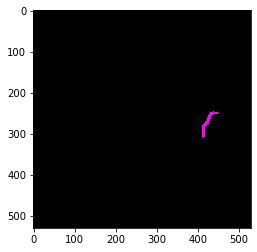

In [14]:
plot_gif(np.load('../22956814/B3_mask_seq_5.npy'), '../22956814/gif/B3_mask_seq_5.gif')

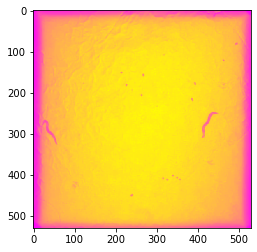

In [15]:
plot_gif(np.load('../22956814/B3_raw_5.npy'), '../22956814/gif/B3_raw_5.gif')

In [17]:
# check worm ids
b3_seq_5 = np.load('../22956814/B3_mask_seq_5.npy')
np.unique(b3_seq_5)

array([0, 1, 2, 3], dtype=int32)

In [18]:
b3_seq_5 = np.load('../22956814/B3_mask_5.npy')
np.unique(b3_seq_5)

FileNotFoundError: [Errno 2] No such file or directory: '../22956814/B3_mask_5.npy'